# Data Analysis

**Notes**:
- Only the owner of the account (on disposition) can issue permanent orders and ask for a loan

## Loading the Data

![Data description](./images/data_description.gif)

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

#Reading CSVs and renaming repeated columns

account = pd.read_csv("data/account.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
district = pd.read_csv("data/district.csv", sep=";") # Demograph

card_train = pd.read_csv("data/card_train.csv", sep=";")
card_test = pd.read_csv("data/card_test.csv", sep=";")  # Credit Card

loan_train = pd.read_csv("data/loan_train.csv", sep=";")
loan_test = pd.read_csv("data/loan_test.csv", sep=";")

trans_train = pd.read_csv("data/trans_train.csv", sep=";")
trans_test = pd.read_csv("data/trans_test.csv", sep=";")

train_data = pd.read_csv("train_data.csv")


/Users/leonorgomes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In this graph, we see the amount of the loan and the status of it for clients that are owners of the cards. With this, we conclude that every owner of the card that asks for loan has the loan granted.

## First Analysis
For a first view of the data, we can check it's shape, some values and data types

### Shape

In [105]:
print(f'''
account shape: {account.shape}
client shape: {client.shape}
disposition shape: {disposition.shape}
district shape: {district.shape}

card_train shape: {card_train.shape}
card_test shape: {card_test.shape}

loan_train shape: {loan_train.shape}
loan_test shape: {loan_test.shape}

trans_train shape: {trans_train.shape}
trans_test shape: {trans_test.shape}
''')


account shape: (4500, 4)
client shape: (5369, 3)
disposition shape: (5369, 4)
district shape: (77, 16)

card_train shape: (177, 4)
card_test shape: (25, 4)

loan_train shape: (328, 7)
loan_test shape: (354, 7)

trans_train shape: (396685, 10)
trans_test shape: (30200, 10)



- Table with most columns: district
- Table with most records: transaction test
- Table with least columns: client
- Table with least records: card test
- 5369 Clients and only 202 credit cards. Not every client has a credit card?
- 5369 Clients and 4500 accounts. Are there clients that do not have an account?
- 5369 Clients and 4500 accounts. Only 682 loans?

### Head
We can check the first 5 entries of each table to get a sense of the data

In [106]:
display("account", account.head())
display("client", client.head())
display("disposition", disposition.head())
display("district", district.head())

display("card_train", card_train.head())
display("card_test", card_test.head())

display("loan_train", loan_train.head())
display("loan_test", loan_test.head())

display("trans_train", trans_train.head())
display("trans_test", trans_test.head())

display("train_data", train_data.head())


'account'

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


'client'

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


'disposition'

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


'district'

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


'card_train'

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


'card_test'

,card_id,disp_id,type,issued
0,813,5873,junior,961028
1,1014,9452,classic,961102
2,408,2560,classic,961210
3,1118,11393,classic,970102
4,565,3601,gold,970106


'loan_train'

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


'loan_test'

,loan_id,account_id,date,amount,duration,payments,status
0,5895,4473,970103,93960,60,1566,NaN
1,7122,10365,970104,260640,36,7240,NaN
2,6173,5724,970108,232560,48,4845,NaN
3,6142,5591,970121,221880,60,3698,NaN
4,5358,2018,970121,38520,12,3210,NaN


'trans_train'

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


'trans_test'

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,6145,25,960728,credit,credit in cash,900.0,900.0,NaN,NaN,NaN
1,6456,25,960827,credit,credit in cash,15800.0,16700.0,NaN,NaN,NaN
2,6150,25,960903,credit,credit in cash,13067.0,29767.0,NaN,NaN,NaN
3,6171,25,960905,credit,credit in cash,42054.0,71821.0,NaN,NaN,NaN
4,6457,25,960906,withdrawal,withdrawal in cash,36000.0,77580.0,NaN,NaN,NaN


'train_data'

,loan_id,amount_loan,duration,payments,status,gender_clt,frequency,region,ratio of urban inhabitants,average salary,...,amount_trans_abs_min,balance_mean,balance_min,balance_max,balance_std,balance_last,balance_abs_min,balance_negative,months_until_bankrupt,ops_per_month
0,4959,80952,24,3373,Yes,M,monthly,Prague,1.000,12541,...,13.5,32590.624074,1100.0,67529.6,12061.705682,27855.2,1100.0,0,8,4.909091
1,4961,30276,12,2523,No,F,monthly,south Bohemia,0.670,9104,...,14.6,25197.092500,715.0,58157.5,15039.248405,15854.0,715.0,0,6,6.666667
2,4973,165960,24,6915,Yes,F,monthly,south Bohemia,0.569,8427,...,14.6,52523.244800,700.0,107069.6,20955.646998,23703.8,700.0,0,3,6.578947
3,4996,88440,12,7370,Yes,F,after-transaction,north Bohemia,0.853,9317,...,100.0,62778.090323,200.0,103239.0,21638.258870,79007.6,200.0,0,10,5.166667
4,5002,104808,12,8734,Yes,M,monthly,south Moravia,0.483,8512,...,14.6,38709.830000,500.0,57865.3,11517.175248,28015.4,500.0,0,3,5.000000


- Account Id is not ordered on account table
- dates in card, loan and transaction train/test are in a special format (xxyyzz, xx-year, yy-month, zz-day)
- There are some NaN in the data

### Data Types

In [71]:
print('---- account  ----')
account.info()
print('\n---- client ----')
client.info()
print('\n---- disposition ----')
disposition.info()
print('\n---- district ----')
district.info()

print('\n---- card_train ----')
card_train.info()
print('\n---- card_test ----')
card_test.info()

print('\n---- loan_train ----')
loan_train.info()
print('\n---- loan_test ----')
loan_test.info()

print('\n---- trans_train ----')
trans_train.info()
print('\n---- trans_test ----')
trans_test.info()

print('\n---- train_data ----')
train_data.info()


---- account  ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB

---- client ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB

---- disposition ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 

- There are a lot of datatype of type `object` which could be strings or may have NaN values
- unemploymant rate '95 and no. of commited crimes '95 should be of type float64, but are objects

### Describe Tables

Object types will have values in count, unique, top and freq. While other data types will have values in count, mean, std, min, 25%, 50%, 75% and max. If there are NaN values, is because it it a metric that does not apply to the data type

In [102]:
display("account", account.describe(include='all'))
display("client", client.describe(include='all'))
display("disposition", disposition.describe(include='all'))
display("district", district.describe(include='all'))

display("card_train", card_train.describe(include='all'))
display("card_test", card_test.describe(include='all'))

display("loan_train", loan_train.describe(include='all'))
display("loan_test", loan_test.describe(include='all'))

display("trans_train", trans_train.describe(include='all'))
display("trans_test", trans_test.describe(include='all'))

display("train_data", train_data.describe(include='all'))

'account'

,account_id,district_id,frequency,date
count,4500.000000,4500.000000,4500,4500.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,monthly issuance,NaN
freq,NaN,NaN,4167,NaN
mean,2786.067556,37.310444,NaN,951654.608667
std,2313.811984,25.177217,NaN,14842.188377
min,1.000000,1.000000,NaN,930101.000000
25%,1182.750000,13.000000,NaN,931227.000000
50%,2368.000000,38.000000,NaN,960102.000000
75%,3552.250000,60.000000,NaN,961101.000000


'client'

,client_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,535114.970013,37.310114
std,2832.911984,172895.618429,25.043690
min,1.000000,110820.000000,1.000000
25%,1418.000000,406009.000000,14.000000
50%,2839.000000,540829.000000,38.000000
75%,4257.000000,681013.000000,60.000000
max,13998.000000,875927.000000,77.000000


'disposition'

,disp_id,client_id,account_id,type
count,5369.000000,5369.000000,5369.000000,5369
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,OWNER
freq,NaN,NaN,NaN,4500
mean,3337.097970,3359.011920,2767.496927,NaN
std,2770.418826,2832.911984,2307.843630,NaN
min,1.000000,1.000000,1.000000,NaN
25%,1418.000000,1418.000000,1178.000000,NaN
50%,2839.000000,2839.000000,2349.000000,NaN
75%,4257.000000,4257.000000,3526.000000,NaN


'district'

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
count,77.000000,77,77,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77,77.000000,77.000000,77,77.000000
unique,NaN,77,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,76,NaN
top,NaN,Usti nad Orlici,south Moravia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38,NaN,NaN,2854,NaN
freq,NaN,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN
mean,39.000000,NaN,NaN,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,NaN,3.787013,116.129870,NaN,5030.831169
std,22.371857,NaN,NaN,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,NaN,1.908480,16.608773,NaN,11270.796786
min,1.000000,NaN,NaN,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,NaN,0.430000,81.000000,NaN,888.000000
25%,20.000000,NaN,NaN,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,NaN,2.310000,105.000000,NaN,2122.000000
50%,39.000000,NaN,NaN,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,NaN,3.600000,113.000000,NaN,3040.000000
75%,58.000000,NaN,NaN,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,NaN,4.790000,126.000000,NaN,4595.000000


'card_train'

,card_id,disp_id,type,issued
count,177.000000,177.000000,177,177.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,classic,NaN
freq,NaN,NaN,127,NaN
mean,433.576271,3031.723164,NaN,954971.259887
std,290.507562,2632.338944,NaN,7217.974691
min,3.000000,41.000000,NaN,931107.000000
25%,183.000000,1080.000000,NaN,950616.000000
50%,397.000000,2513.000000,NaN,960221.000000
75%,661.000000,4270.000000,NaN,960831.000000


'card_test'

,card_id,disp_id,type,issued
count,25.00000,25.000000,25,25.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,classic,NaN
freq,NaN,NaN,20,NaN
mean,670.12000,5839.960000,NaN,972351.280000
std,394.98727,4387.770936,NaN,6111.008472
min,17.00000,127.000000,NaN,961028.000000
25%,408.00000,2560.000000,NaN,970520.000000
50%,623.00000,3984.000000,NaN,970828.000000
75%,1014.00000,9452.000000,NaN,980109.000000


'loan_train'

,loan_id,account_id,date,amount,duration,payments,status
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,5982.085366,949989.125000,145308.621951,35.853659,4150.932927,0.719512
std,667.985675,3213.262492,9495.504646,105247.318098,16.734752,2193.620989,0.695541
min,4959.000000,2.000000,930705.000000,4980.000000,12.000000,319.000000,-1.000000
25%,5604.250000,3079.000000,940809.250000,68328.000000,24.000000,2368.750000,1.000000
50%,6227.500000,6032.000000,950565.500000,114804.000000,36.000000,3878.500000,1.000000
75%,6737.250000,8564.500000,960525.250000,198600.000000,48.000000,5907.750000,1.000000
max,7308.000000,11362.000000,961227.000000,538500.000000,60.000000,9689.000000,1.000000


'loan_test'

,loan_id,account_id,date,amount,duration,payments,status
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,0.0
mean,6141.711864,5677.838983,975109.045198,157063.593220,37.084746,4227.477401,NaN
std,695.356054,3345.166236,4928.280822,120285.252766,17.387392,2238.683851,NaN
min,4962.000000,25.000000,970103.000000,5148.000000,12.000000,304.000000,NaN
25%,5528.000000,2734.250000,970619.000000,66696.000000,24.000000,2486.750000,NaN
50%,6100.500000,5378.500000,971208.000000,120804.000000,36.000000,4003.000000,NaN
75%,6761.750000,8764.500000,980516.500000,220437.000000,48.000000,5686.500000,NaN
max,7295.000000,11328.000000,981208.000000,590820.000000,60.000000,9910.000000,NaN


'trans_train'

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
count,3.966850e+05,396685.000000,396685.000000,396685,325924,396685.000000,396685.000000,211441,97242,1.022290e+05
unique,NaN,NaN,NaN,3,5,NaN,NaN,7,13,NaN
top,NaN,NaN,NaN,withdrawal,withdrawal in cash,NaN,NaN,interest credited,ST,NaN
freq,NaN,NaN,NaN,232093,165270,NaN,NaN,70761,8114,NaN
mean,1.239338e+06,2508.434796,951310.066801,NaN,NaN,5677.552980,35804.792507,NaN,NaN,4.664229e+07
std,1.213288e+06,2020.928889,9510.974536,NaN,NaN,9190.364137,19692.148243,NaN,NaN,3.002136e+07
min,1.000000e+00,1.000000,930101.000000,NaN,NaN,0.000000,-13588.700000,NaN,NaN,0.000000e+00
25%,3.918330e+05,1092.000000,941110.000000,NaN,NaN,127.500000,22424.300000,NaN,NaN,1.990018e+07
50%,7.882580e+05,2220.000000,950930.000000,NaN,NaN,1952.000000,30959.600000,NaN,NaN,4.673618e+07
75%,1.273700e+06,3357.000000,960606.000000,NaN,NaN,6500.000000,44661.000000,NaN,NaN,7.232217e+07


'trans_test'

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
count,3.020000e+04,30200.000000,30200.000000,30200,25070,30200.000000,30200.000000,12781,5823,9.139000e+03
unique,NaN,NaN,NaN,3,5,NaN,NaN,6,13,NaN
top,NaN,NaN,NaN,withdrawal,withdrawal in cash,NaN,NaN,interest credited,YZ,NaN
freq,NaN,NaN,NaN,17462,13889,NaN,NaN,5130,501,NaN
mean,1.997768e+06,5639.798344,969666.689901,NaN,NaN,8978.861517,44644.210795,NaN,NaN,3.352367e+07
std,1.172841e+06,3362.670775,6984.081578,NaN,NaN,12456.202612,24068.542647,NaN,NaN,3.438393e+07
min,6.145000e+03,25.000000,950419.000000,NaN,NaN,0.200000,-17030.400000,NaN,NaN,0.000000e+00
25%,9.273805e+05,2720.000000,961214.000000,NaN,NaN,216.800000,27441.450000,NaN,NaN,0.000000e+00
50%,2.042316e+06,5477.000000,970522.000000,NaN,NaN,3700.000000,40378.200000,NaN,NaN,2.314050e+07
75%,3.117521e+06,8772.000000,971117.000000,NaN,NaN,12300.000000,57737.200000,NaN,NaN,6.515492e+07


'train_data'

,loan_id,amount_loan,duration,payments,status,age_clt,gender_clt,frequency,age_acc,type_trans_count_withdrawal,...,amount_trans_last,amount_trans_abs_min,amount_trans_rangev,balance_mean,balance_min,balance_max,balance_std,balance_last,balance_abs_min,balance_rangev
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6205.658537,145308.621951,35.853659,4150.932927,0.719512,62.161585,NaN,1.100610,26.908537,44.262195,...,8833.478963,26.967683,40045.186280,43292.897145,630.187500,88496.975305,18252.081121,41737.996646,709.358537,87866.787805
std,667.985675,105247.318098,16.734752,2193.620989,0.695541,12.556227,NaN,0.448169,1.062649,31.056299,...,10562.976877,70.430950,16958.705384,13280.435504,1106.068371,34528.708477,7359.406050,22102.067384,980.882665,34605.185329
min,4959.000000,4980.000000,12.000000,319.000000,-1.000000,40.000000,NaN,0.000000,25.000000,0.000000,...,14.600000,0.100000,8183.700000,12250.000000,-3424.600000,20100.000000,5423.587577,3609.300000,36.100000,19000.000000
25%,5604.250000,68328.000000,24.000000,2368.750000,1.000000,51.000000,NaN,1.000000,26.000000,20.000000,...,675.000000,14.600000,25780.425000,32592.166019,300.000000,59579.150000,11810.935935,25652.250000,378.750000,57677.200000
50%,6227.500000,114804.000000,36.000000,3878.500000,1.000000,62.000000,NaN,1.000000,27.000000,40.000000,...,5050.000000,14.600000,42614.450000,42183.600179,600.000000,82666.800000,18556.828635,38039.950000,600.000000,81945.900000
75%,6737.250000,198600.000000,48.000000,5907.750000,1.000000,72.250000,NaN,1.000000,28.000000,62.250000,...,12800.000000,24.350000,54100.950000,53012.584864,900.000000,120181.750000,24215.471913,51853.150000,900.000000,119742.400000


### Check object types

First thing to analyse are the data type `object` columns

In [107]:
print("------ account ------")
print("-> frequency")
display(account["frequency"].value_counts())

print("\n------ disposition ------")
print("-> type")
display(disposition["type"].value_counts())

print("\n------ district ------")
print("-> name")
display(district["name "].value_counts())
print("-> region")
display(district["region"].value_counts())
print("-> unemploymant rate '95")
display(district["unemploymant rate '95 "].value_counts())
print("-> no. of commited crimes '95")
display(district["no. of commited crimes '95 "].value_counts())


print("\n------ card_train ------")
print("-> type")
display(card_train["type"].value_counts())

print("\n------ card_test ------")
print("-> type")
display(card_test["type"].value_counts())

print("\n------ trans_train ------")
print("-> type")
display(trans_train["type"].value_counts())
print("-> operation")
display(trans_train["operation"].value_counts())
print("-> k_symbol")
display(trans_train["k_symbol"].value_counts())
print("-> bank")
display(trans_train["bank"].value_counts())

print("\n------ trans_test ------")
print("-> type")
display(trans_test["type"].value_counts())
print("-> operation")
display(trans_test["operation"].value_counts())
print("-> k_symbol")
display(trans_test["k_symbol"].value_counts())
print("-> bank")
display(trans_test["bank"].value_counts())

------ account ------
-> frequency


monthly issuance              4167
weekly issuance                240
issuance after transaction      93
Name: frequency, dtype: int64


------ disposition ------
-> type


OWNER        4500
DISPONENT     869
Name: type, dtype: int64


------ district ------
-> name


Havlickuv Brod       1
Zdar nad Sazavou     1
Frydek - Mistek      1
Jindrichuv Hradec    1
Karvina              1
                    ..
Znojmo               1
Prachatice           1
Hodonin              1
Plzen - jih          1
Olomouc              1
Name: name , Length: 77, dtype: int64

-> region


south Moravia      14
central Bohemia    12
east Bohemia       11
north Moravia      11
north Bohemia      10
west Bohemia       10
south Bohemia       8
Prague              1
Name: region, dtype: int64

-> unemploymant rate '95


1.51    2
1.79    2
3.13    2
1.60    2
3.38    2
       ..
1.72    1
2.95    1
1.25    1
6.43    1
1.42    1
Name: unemploymant rate '95 , Length: 71, dtype: int64

-> no. of commited crimes '95


2854     2
3384     1
18782    1
3475     1
818      1
        ..
3460     1
1822     1
2112     1
5244     1
2299     1
Name: no. of commited crimes '95 , Length: 76, dtype: int64


------ card_train ------
-> type


classic    127
junior      41
gold         9
Name: type, dtype: int64


------ card_test ------
-> type


classic    20
junior      4
gold        1
Name: type, dtype: int64


------ trans_train ------
-> type


withdrawal            232093
credit                159468
withdrawal in cash      5124
Name: type, dtype: int64

-> operation


withdrawal in cash              165270
remittance to another bank       70737
credit in cash                   62202
collection from another bank     26505
credit card withdrawal            1210
Name: operation, dtype: int64

-> k_symbol


interest credited                        70761
payment for statement                    58377
household                                42839
                                         19065
old-age pension                          13502
insurrance payment                        6592
sanction interest if negative balance      305
Name: k_symbol, dtype: int64

-> bank


ST    8114
GH    7886
EF    7878
AB    7666
UV    7618
OP    7595
IJ    7536
YZ    7471
QR    7413
KL    7397
WX    7033
CD    7009
MN    6626
Name: bank, dtype: int64


------ trans_test ------
-> type


withdrawal            17462
credit                11882
withdrawal in cash      856
Name: type, dtype: int64

-> operation


withdrawal in cash              13889
credit in cash                   5304
remittance to another bank       4375
collection from another bank     1448
credit card withdrawal             54
Name: operation, dtype: int64

-> k_symbol


interest credited                        5130
payment for statement                    3186
household                                2192
                                         1549
insurrance payment                        681
sanction interest if negative balance      43
Name: k_symbol, dtype: int64

-> bank


YZ    501
UV    500
WX    497
KL    482
QR    460
OP    446
IJ    438
AB    438
GH    432
MN    431
CD    414
EF    401
ST    383
Name: bank, dtype: int64

- Some columns have a ' ' after the column name in district
- Transaction types (+/-) should be only withdrawal and credit, withdrawal in cash shouldn't be there (should be only withdrawal)
- k-symbol as white values


## Explore the dataset

This function allows to create a graph that shows the correlation between different paramenters.

In [108]:
def get_correlation(df):

    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True


    plt.subplots(figsize=(30,24))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot = True)

    y_lim = ax.get_ylim();
    ax.set_ylim(np.ceil(y_lim[0]), np.floor(y_lim[1]))
    

    plt.show()
    
    

### Box Plots

Box plots are great ways to detect outliers in the data. They were used to analyse in which parameters there could be more outliers.

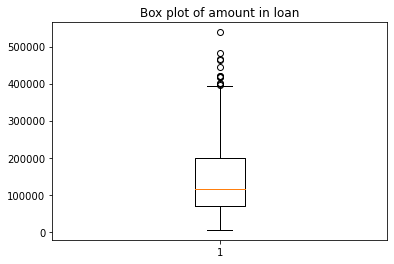

In [126]:
plt.title("Box plot of amount in loan")
plt.boxplot(loan_train["amount"])

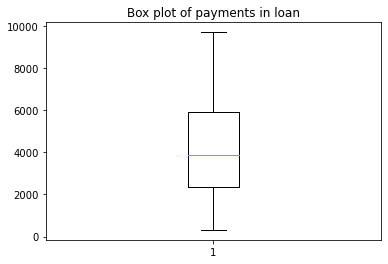

In [127]:
plt.title("Box plot of payments in loan")
plt.boxplot(loan_train["payments"])

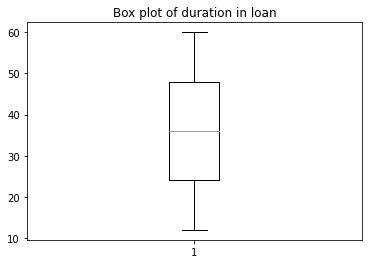

In [128]:
plt.title("Box plot of duration in loan")
plt.boxplot(loan_train["duration"])

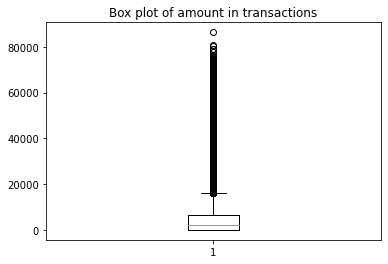

In [129]:
plt.title("Box plot of amount in transactions")
plt.boxplot(trans_train["amount"])

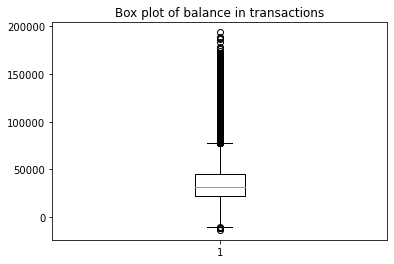

In [130]:
plt.title("Box plot of balance in transactions")
plt.boxplot(trans_train["balance"])

### Bar Plots

This bar plot shows the number of loans given and the number of loans not given side by side. From this graph, you can understand that, for most cases, the loan was given. Therefore, this can be considered and unbalanced dataset, making it harder to predict when loans are not given.

<BarContainer object of 2 artists>

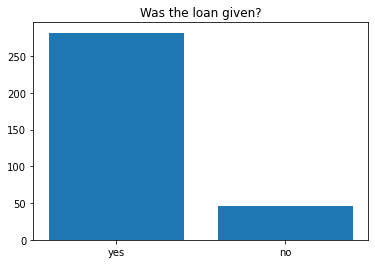

In [114]:
status_values = loan_train["status"].value_counts()
plt.title("Was the loan given?")
plt.bar(["yes", "no"], status_values)

If we check the clients that are owner of cards and have asked for a loan, every client has received the loan, as we can see from this graph.

/Users/leonorgomes/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Users/leonorgomes/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


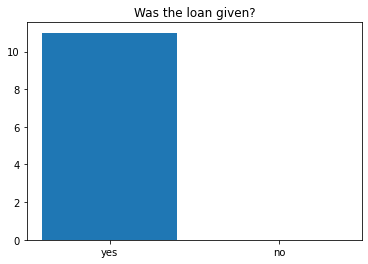

In [135]:
clientCardData = disposition.merge(card_train, on='disp_id')
clientCardData = clientCardData.merge(client, on='client_id')
clientCardData = clientCardData.merge(loan_train, on='account_id')


status_values = clientCardData["status"].value_counts()
plt.title("Was the loan given?")
plt.bar(["yes", "no"], [status_values, 0])

plt.savefig('bar_loan_clientCard.png')



This bar plot shows the frequency of accounts. Looking at this image, we can understand that most accounts have a monthly issuance.

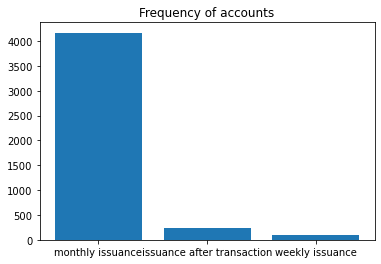

In [136]:
frequency_values = account["frequency"].value_counts()
plt.title("Frequency of accounts")
plt.bar(account["frequency"].unique(), frequency_values)

plt.savefig('bar_acc_frequency.png')

This graph shows the number of each type of dispositions in the dataset. We can conclude that most clients are owners.

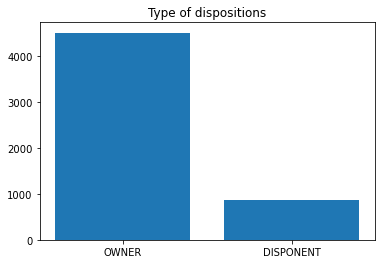

In [137]:
type_values = disposition["type"].value_counts()
plt.title("Type of dispositions")
plt.bar(disposition["type"].unique(), type_values)
plt.savefig('bar_type_disponent.png')

This bar plot represents the number of cards per type. From this image, we can conclude that most cards are classic.

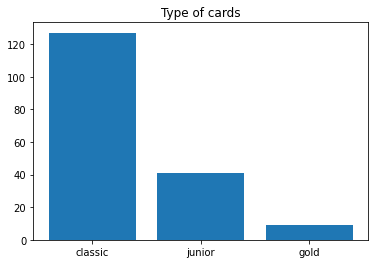

In [138]:
card_type_values = card_train["type"].value_counts()
plt.title("Type of cards")
plt.bar(card_train["type"].unique(), card_type_values)

This bar plot shows the number of districts per region. We can then conclude that the region with more districts is Prague.

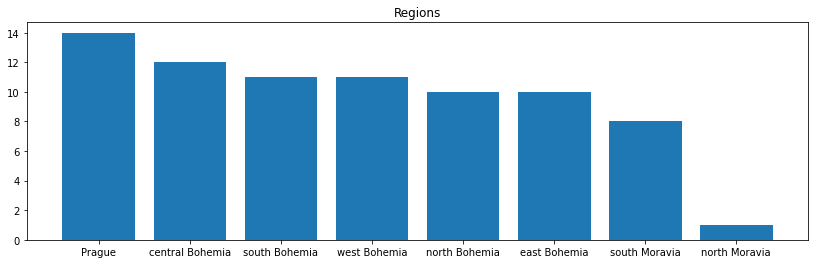

In [139]:
region_values = district["region"].value_counts()
plt.subplots(figsize=(14,4))
plt.title("Regions")
plt.bar(district["region"].unique(), region_values)

This barplot has the frequency of operations in the dataset. Therefore, the most common operation is "credit in cash".

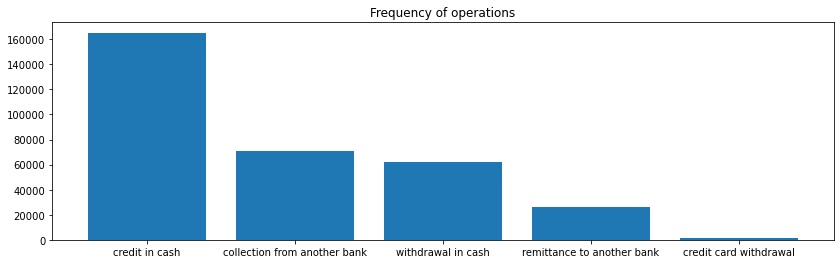

In [140]:
operation_values = trans_train["operation"].value_counts()
plt.subplots(figsize=(14,4))
plt.title("Frequency of operations")
plt.bar(trans_train["operation"].dropna().unique(), operation_values)

This barplot shows the mean of the amount of the loan for each case, if the loan was given or not. We can see that the amount for cases where the loan was not given was higher than for the ones that the loan was given.

<BarContainer object of 2 artists>

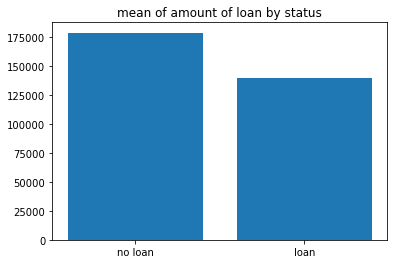

In [121]:
values = train_data.groupby('status')['amount_loan'].mean()
plt.title("mean of amount of loan by status")
plt.bar(["no loan", "loan"], values)

This barplot shows the mean of the paymbers of the loan for each case, if the loan was given or not. We can see that the payments for cases where the loan was not given was also higher than for the ones that the loan was given.

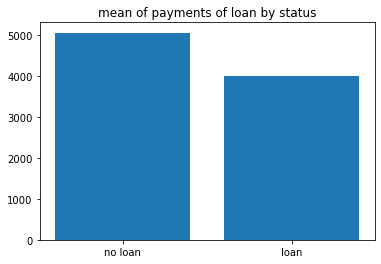

In [141]:
values = train_data.groupby('status')['payments'].mean()
plt.title("mean of payments of loan by status")
plt.bar(["no loan", "loan"], values)

There is no correlation between gender and status of the loan. From this graph, you can see that from each status (loan and no loan), the number of males and females is very well balanced.

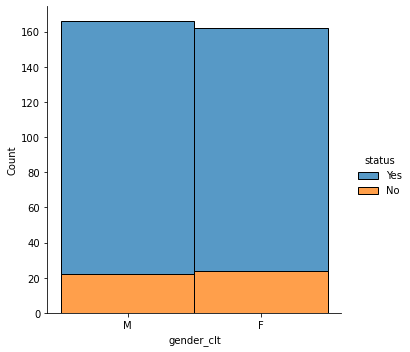

In [123]:
sns.displot(train_data, x="gender_clt", hue="status", multiple="stack")

## Correlograms

## Correlation Map

Calculating the correlation among parameters helps a lot to understand which features you can remove before applying the model. For features that have a correlation between 0.95 and 1, it doesn't really make sense to have both of them to predict the results.

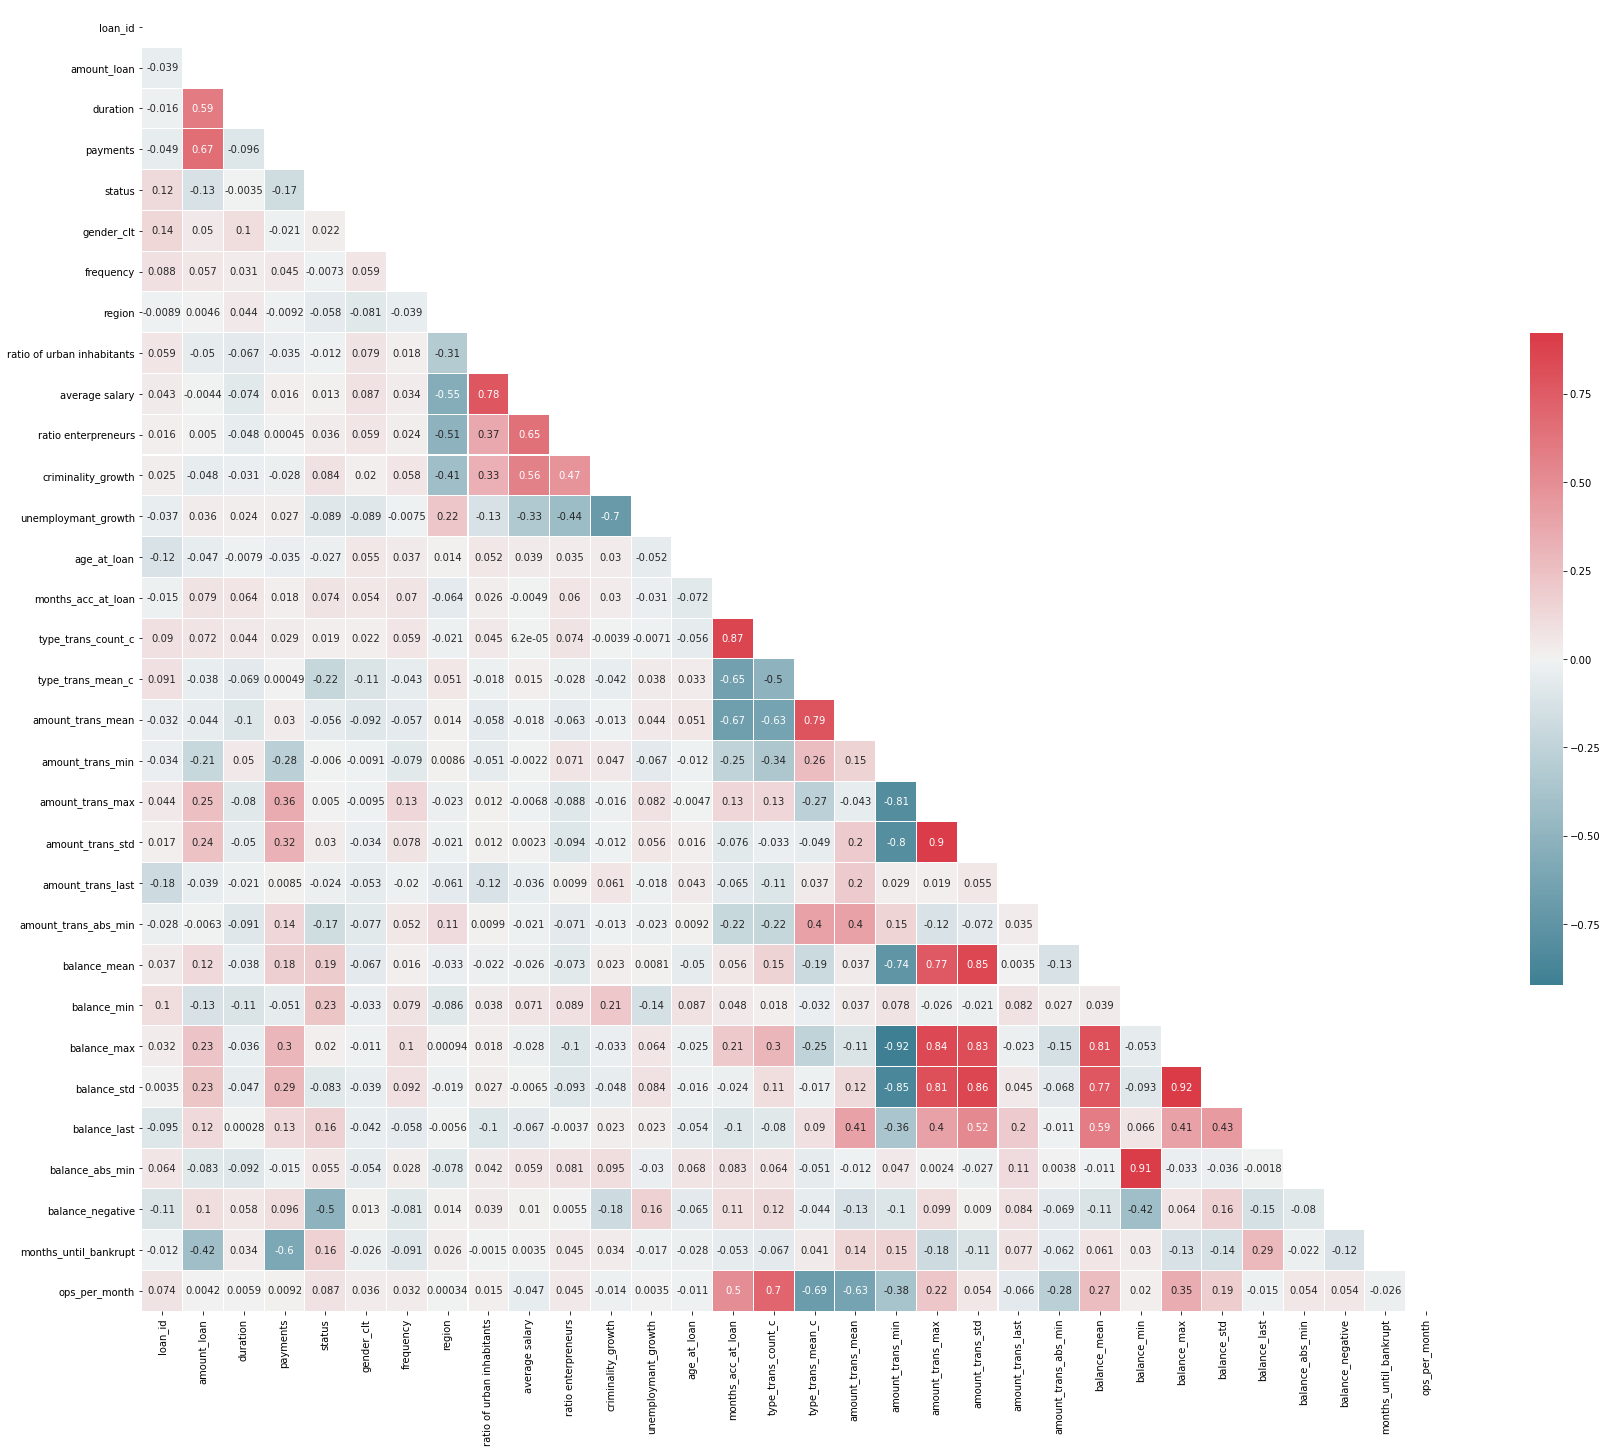

In [124]:
from sklearn.preprocessing import LabelEncoder

def encode_label(data, cols):
    data_copy = data.copy()
    data_copy[cols] = data_copy[cols].apply(LabelEncoder().fit_transform)

    return data_copy


cols_encode = ['status', 'gender_clt', 'frequency', 'region']
train_data_labeled = encode_label(train_data, cols_encode)

get_correlation(train_data_labeled)


### Distribution

This is a distribution of the age of the client at the time they asked for the loan. From this image, we can conclude that most people apply for a loan when they are 30-40 years.

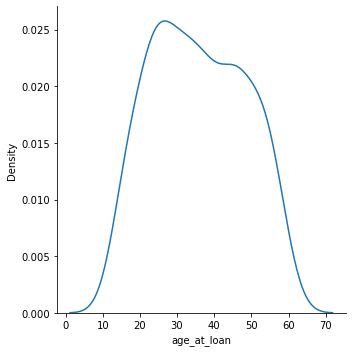

In [97]:
sns.displot(train_data, x="age_at_loan", kind="kde")

## 3D Scatter Plots

For these graphs, if it's green, it means that the loan was given and if it's red, it means that the loan was not given.

This scatter plot shows the payment and the loan amount (besides the status). We can then conclude that the bigger the payment, the bigger the amount.

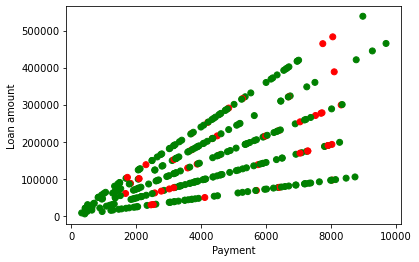

In [98]:
ys = train_data['amount_loan']
x = train_data['payments']

colors = ['g' if s == "Yes" else 'r' for s in train_data['status']]
plt.ylabel('Loan amount')
plt.xlabel('Payment')
plt.scatter(x, ys, color=colors)

This graph puts together the average salary and the loan amount. From that, we can see that there is no direct correlation between them.

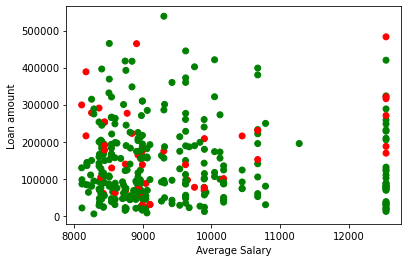

In [131]:
ys = train_data['amount_loan']
x = train_data['average salary']

colors = ['g' if s == 'Yes' else 'r' for s in train_data['status']]
plt.ylabel('Loan amount')
plt.xlabel('Average Salary')
plt.scatter(x, ys, color=colors)

This graph puts together the average salary and the ratio of urban inhabitants. We can then conclude that there is some correlation between these too, the bigger the average salary, the bigger the ratio of urban inhabitants.

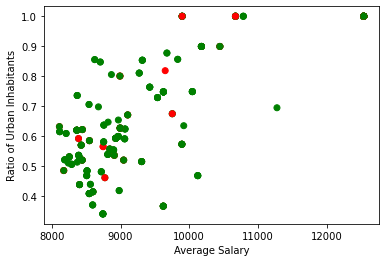

In [100]:
ys = train_data['ratio of urban inhabitants']
x = train_data['average salary']

colors = ['g' if s == 'Yes' else 'r' for s in train_data['status']]
plt.ylabel('Ratio of Urban Inhabitants')
plt.xlabel('Average Salary')
plt.scatter(x, ys, color=colors)

This scatter plot puts together the unemployment growth and the criminality growth. Contrary to what one might belive, visually there is no strong correlation between these two.

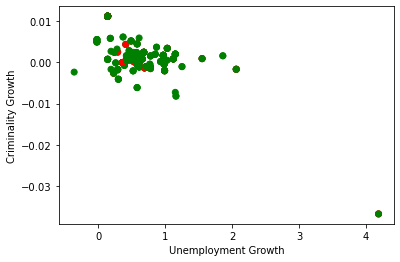

In [132]:
ys = train_data['criminality_growth']
x = train_data['unemploymant_growth']

colors = ['g' if s == 'Yes' else 'r' for s in train_data['status']]
plt.ylabel('Criminality Growth')
plt.xlabel('Unemployment Growth')
plt.scatter(x, ys, color=colors)

This scatter plot relates the ratio enterpreneurs and the average salary. Again, visually there is no strong correlation between these two.

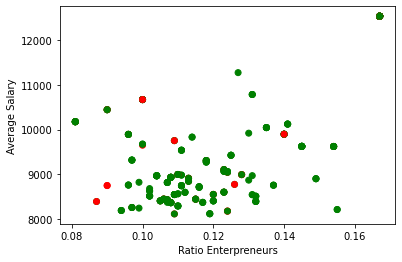

In [133]:
ys = train_data['average salary']
x = train_data['ratio enterpreneurs']

colors = ['g' if s == 'Yes' else 'r' for s in train_data['status']]
plt.ylabel('Average Salary')
plt.xlabel('Ratio Enterpreneurs')
plt.scatter(x, ys, color=colors)

This graph shows the average salary and the criminality growth. Even though one might think they could be strongly correlated, there is no indication of that in this image.

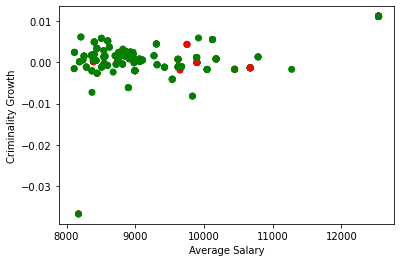

In [134]:
ys = train_data['criminality_growth']
x = train_data['average salary']

colors = ['g' if s == 'Yes' else 'r' for s in train_data['status']]
plt.ylabel('Criminality Growth')
plt.xlabel('Average Salary')
plt.scatter(x, ys, color=colors)